# Book Recomendation System

dataset link :- https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

- The goal of a book recommendation system is to provide users with recommendations that are tailored based on user feedback.
- you enter a book name  , based on existing user database we will look for users who have read that book.
    - we will analyse the reading activity for those users , and recommend the books read by these readers
    - we are assuming if two users like the same thing they are likely to have other simillar intrests as well.
    - this method is call <b>Collaborative Filtering</b>.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('dataset/books.csv')
users = pd.read_csv('dataset/users.csv')
ratings = pd.read_csv('dataset/ratings.csv')

print(books.shape)
print(users.shape)
print(ratings.shape)

/var/folders/nh/j5jgfvm924d8cvj_h81j55r80000gn/T/ipykernel_17760/1142930598.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('dataset/books.csv')


(271360, 8)
(278858, 3)
(1149780, 3)


## EDA

### books

In [3]:
print(books.info())
print('\nDUP :-',books.duplicated().sum())
books.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

DUP :- 0


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [4]:
books = books[books['Book-Author'].notna()]
books = books[books['Publisher'].notna()]
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271357 non-null  object
 3   Year-Of-Publication  271357 non-null  object
 4   Publisher            271357 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [5]:
def plot_value_count(df,col,figsize=(11,4),rotate=False):
    plt.figure(figsize=figsize)
    plt.grid()
    if rotate:
        ax= sns.countplot(y=col,data=df)
        for p in ax.patches:
            ax.annotate('{0}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    else:
        ax = sns.countplot(x=col,data=df)
        for p in ax.patches:
            ax.annotate('{0}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

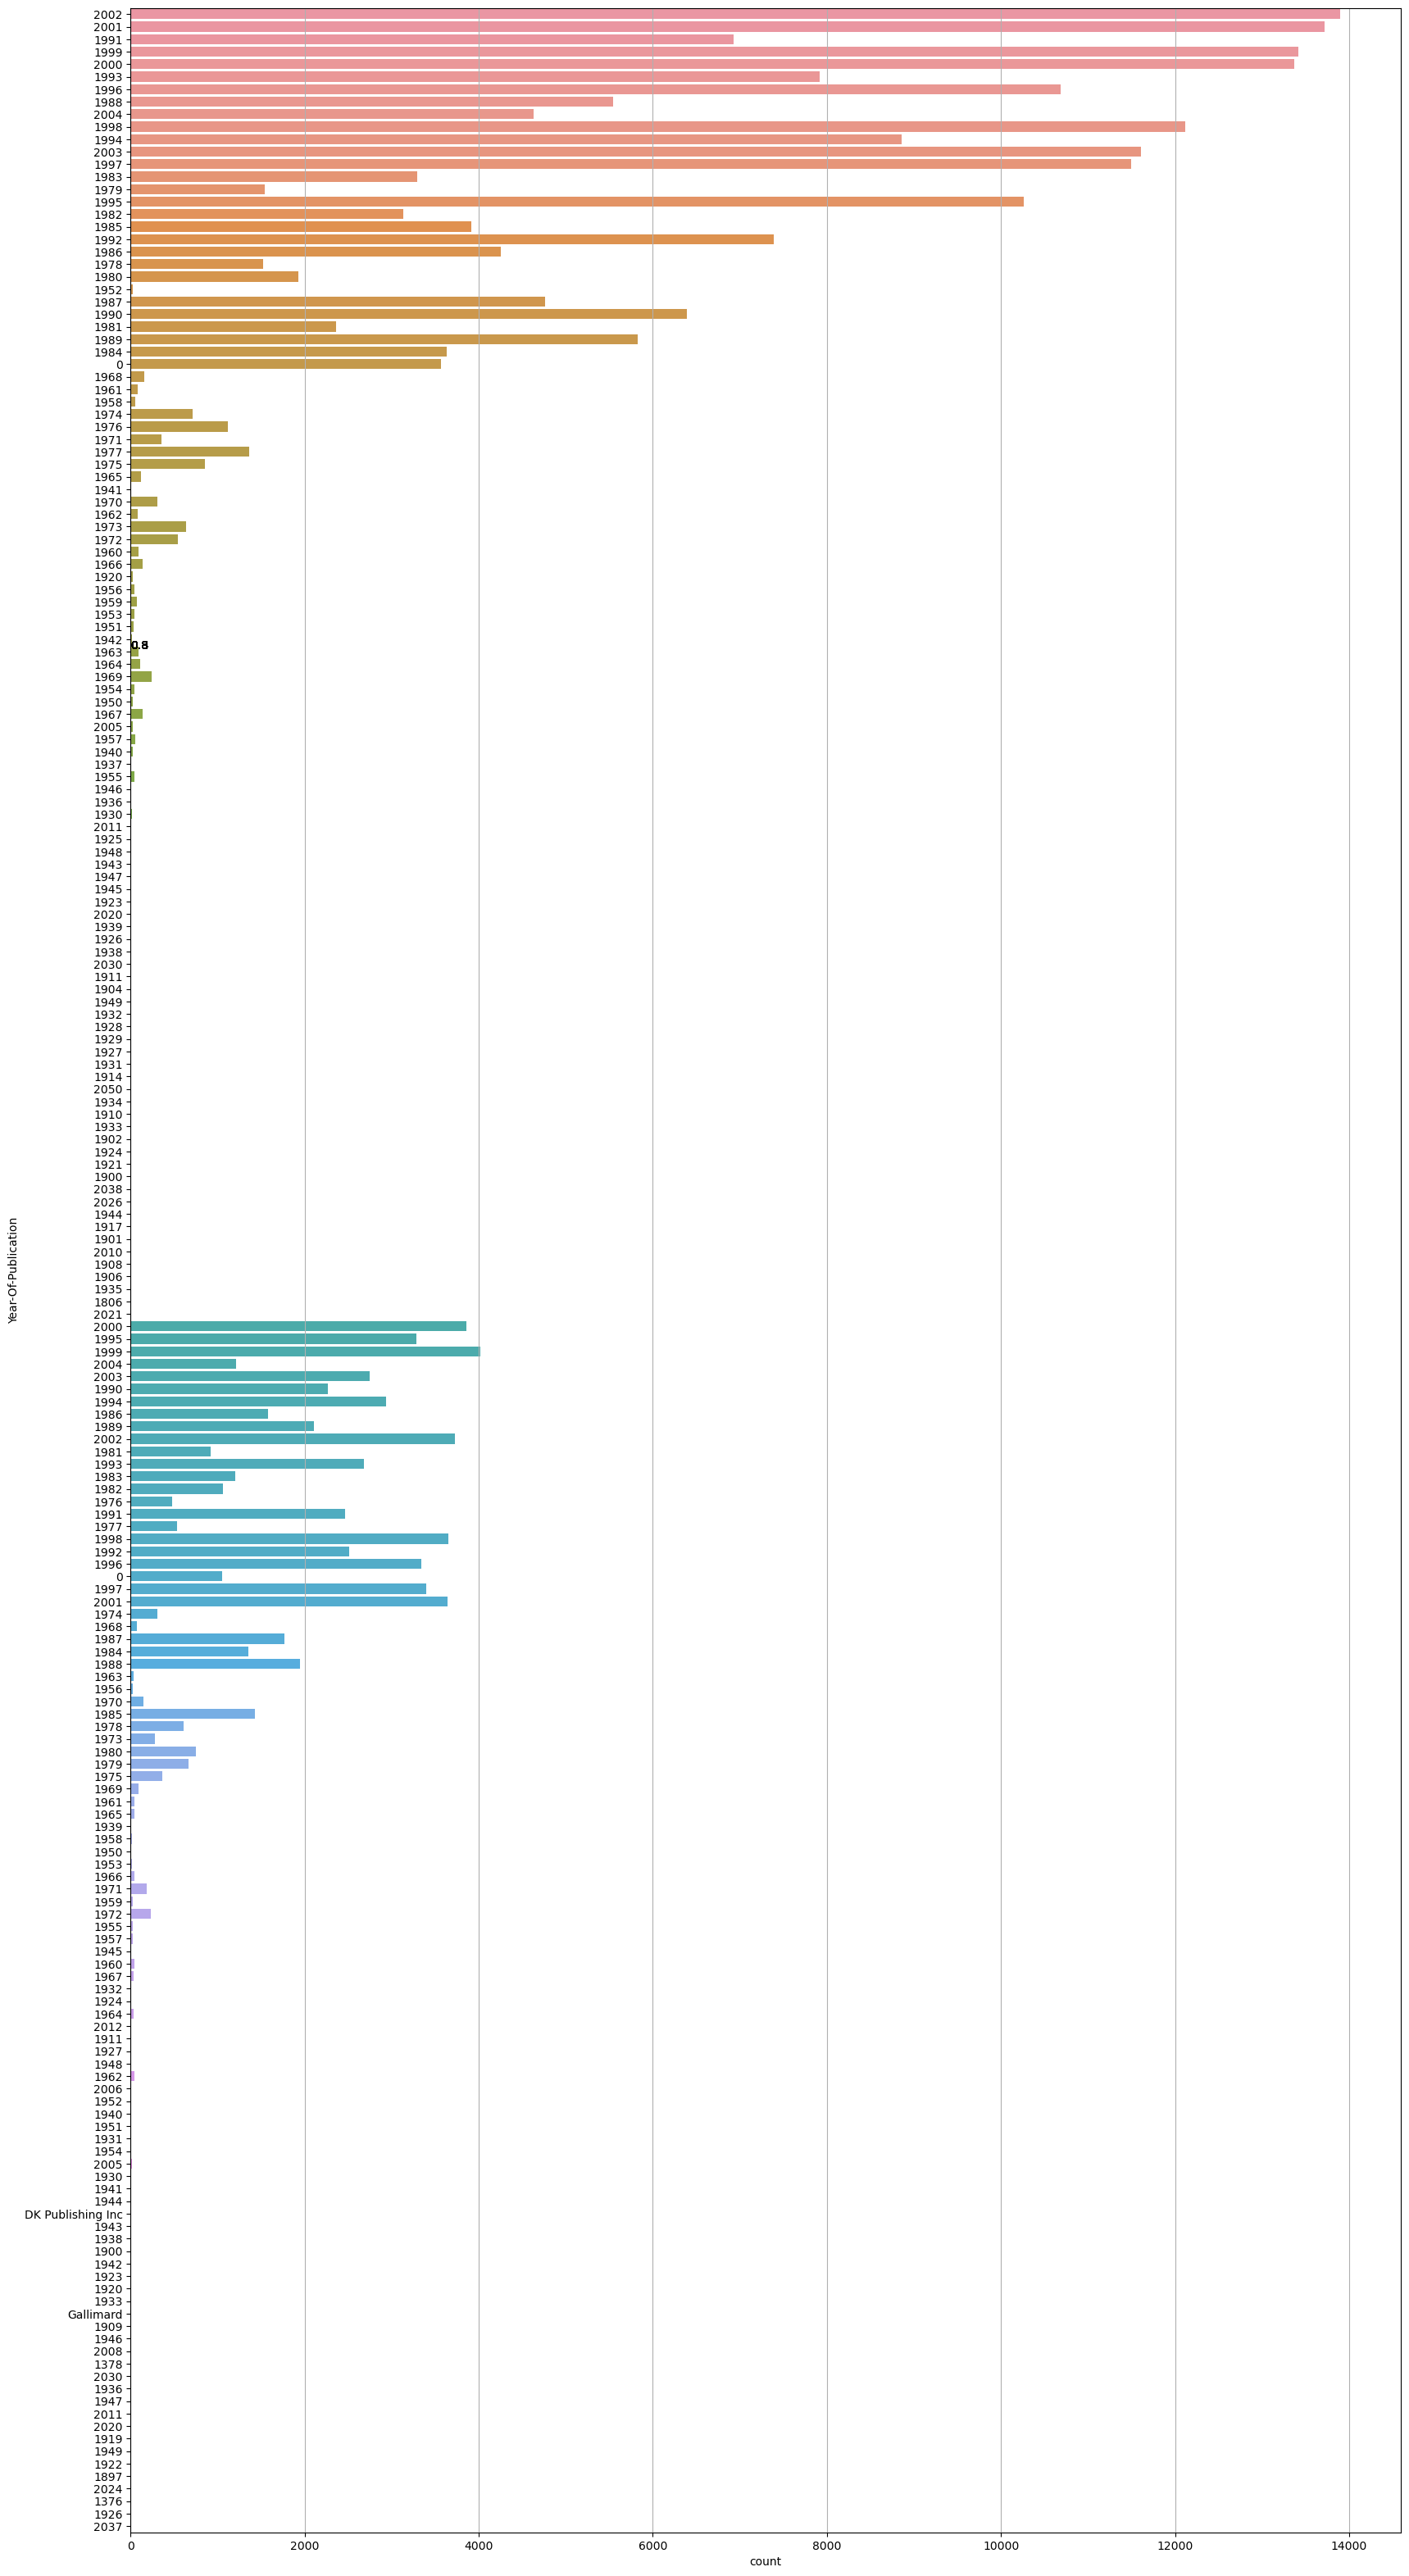

In [6]:
plot_value_count(books,'Year-Of-Publication',figsize=(20,40),rotate=True)

In [7]:
# from above plot , we need to remove row with Year-Of-Publication = ['Gallimard',DK Publishing Inc ,0 ]
# as they are not year
books = books[books['Year-Of-Publication']!='Gallimard']
books = books[books['Year-Of-Publication']!='DK Publishing Inc']
print(books.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB
None


In [8]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int64 
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


In [9]:
# print(books.columns)
books['Book-Title'] = books['Book-Title'].apply(str.lower)
books['Book-Author'] = books['Book-Author'].apply(str.lower)
books['Publisher'] = books['Publisher'].apply(str.lower)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,mark p. o. morford,2002,oxford university press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,richard bruce wright,2001,harperflamingo canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,carlo d'este,1991,harperperennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,gina bari kolata,1999,farrar straus giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,e. j. w. barber,1999,w. w. norton &amp; company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int64 
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


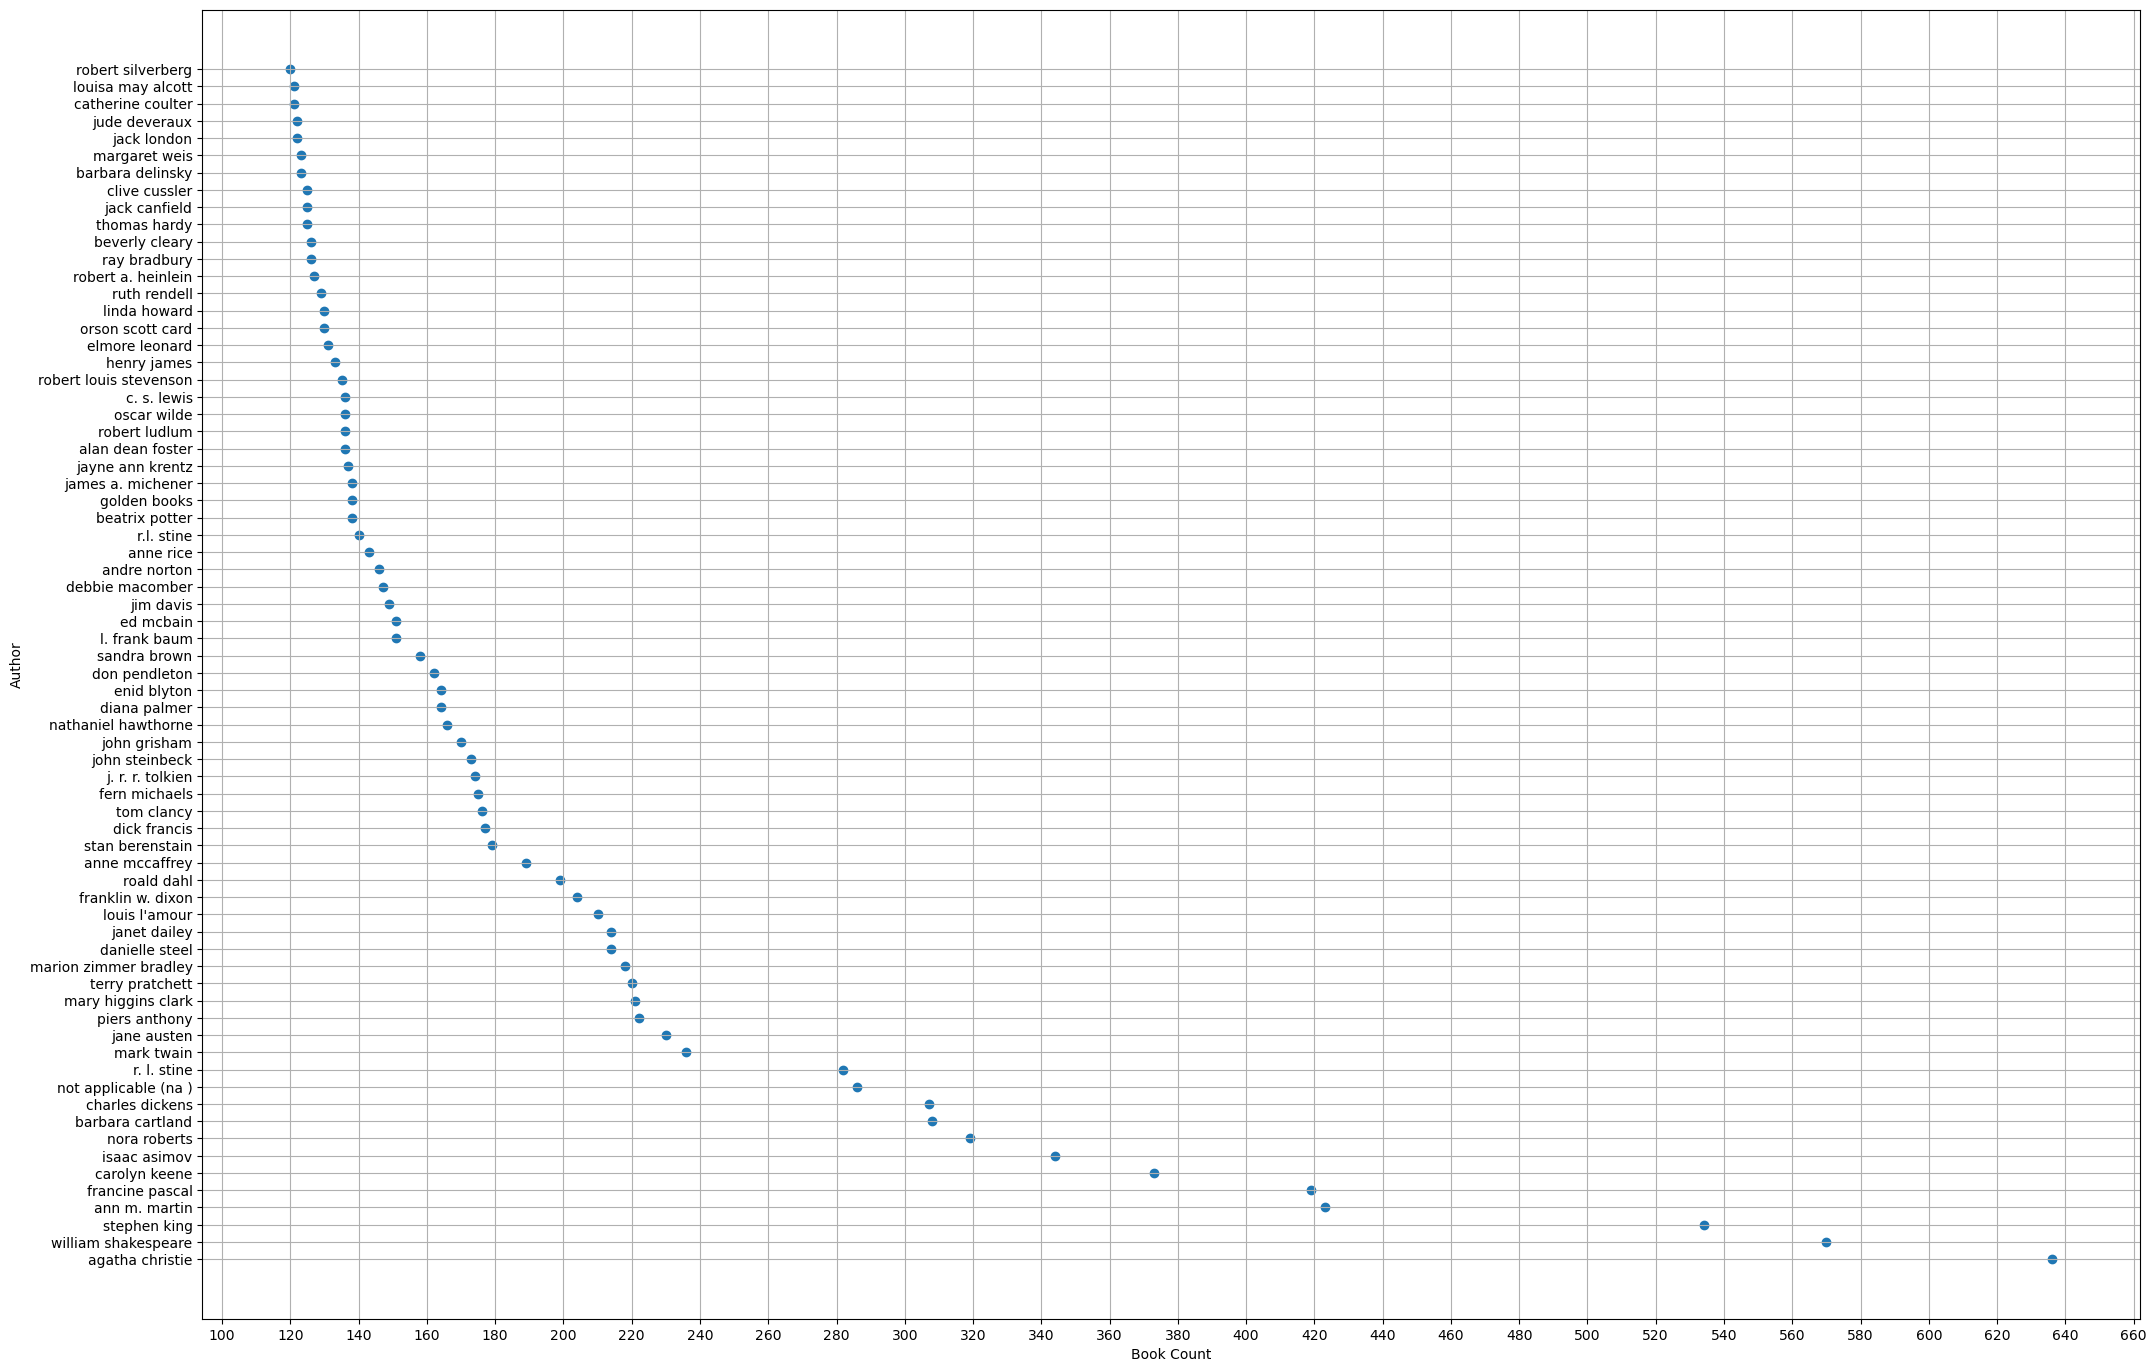

In [94]:
# authors with most amount of books
x = books['Book-Author'].value_counts().head(70)
plt.figure(figsize=((25,17)))
plt.grid()
plt.xticks(np.arange(100,700,step=20))
plt.xlabel('Book Count')
plt.ylabel('Author')
plt.scatter(x=x.values,y=x.index)

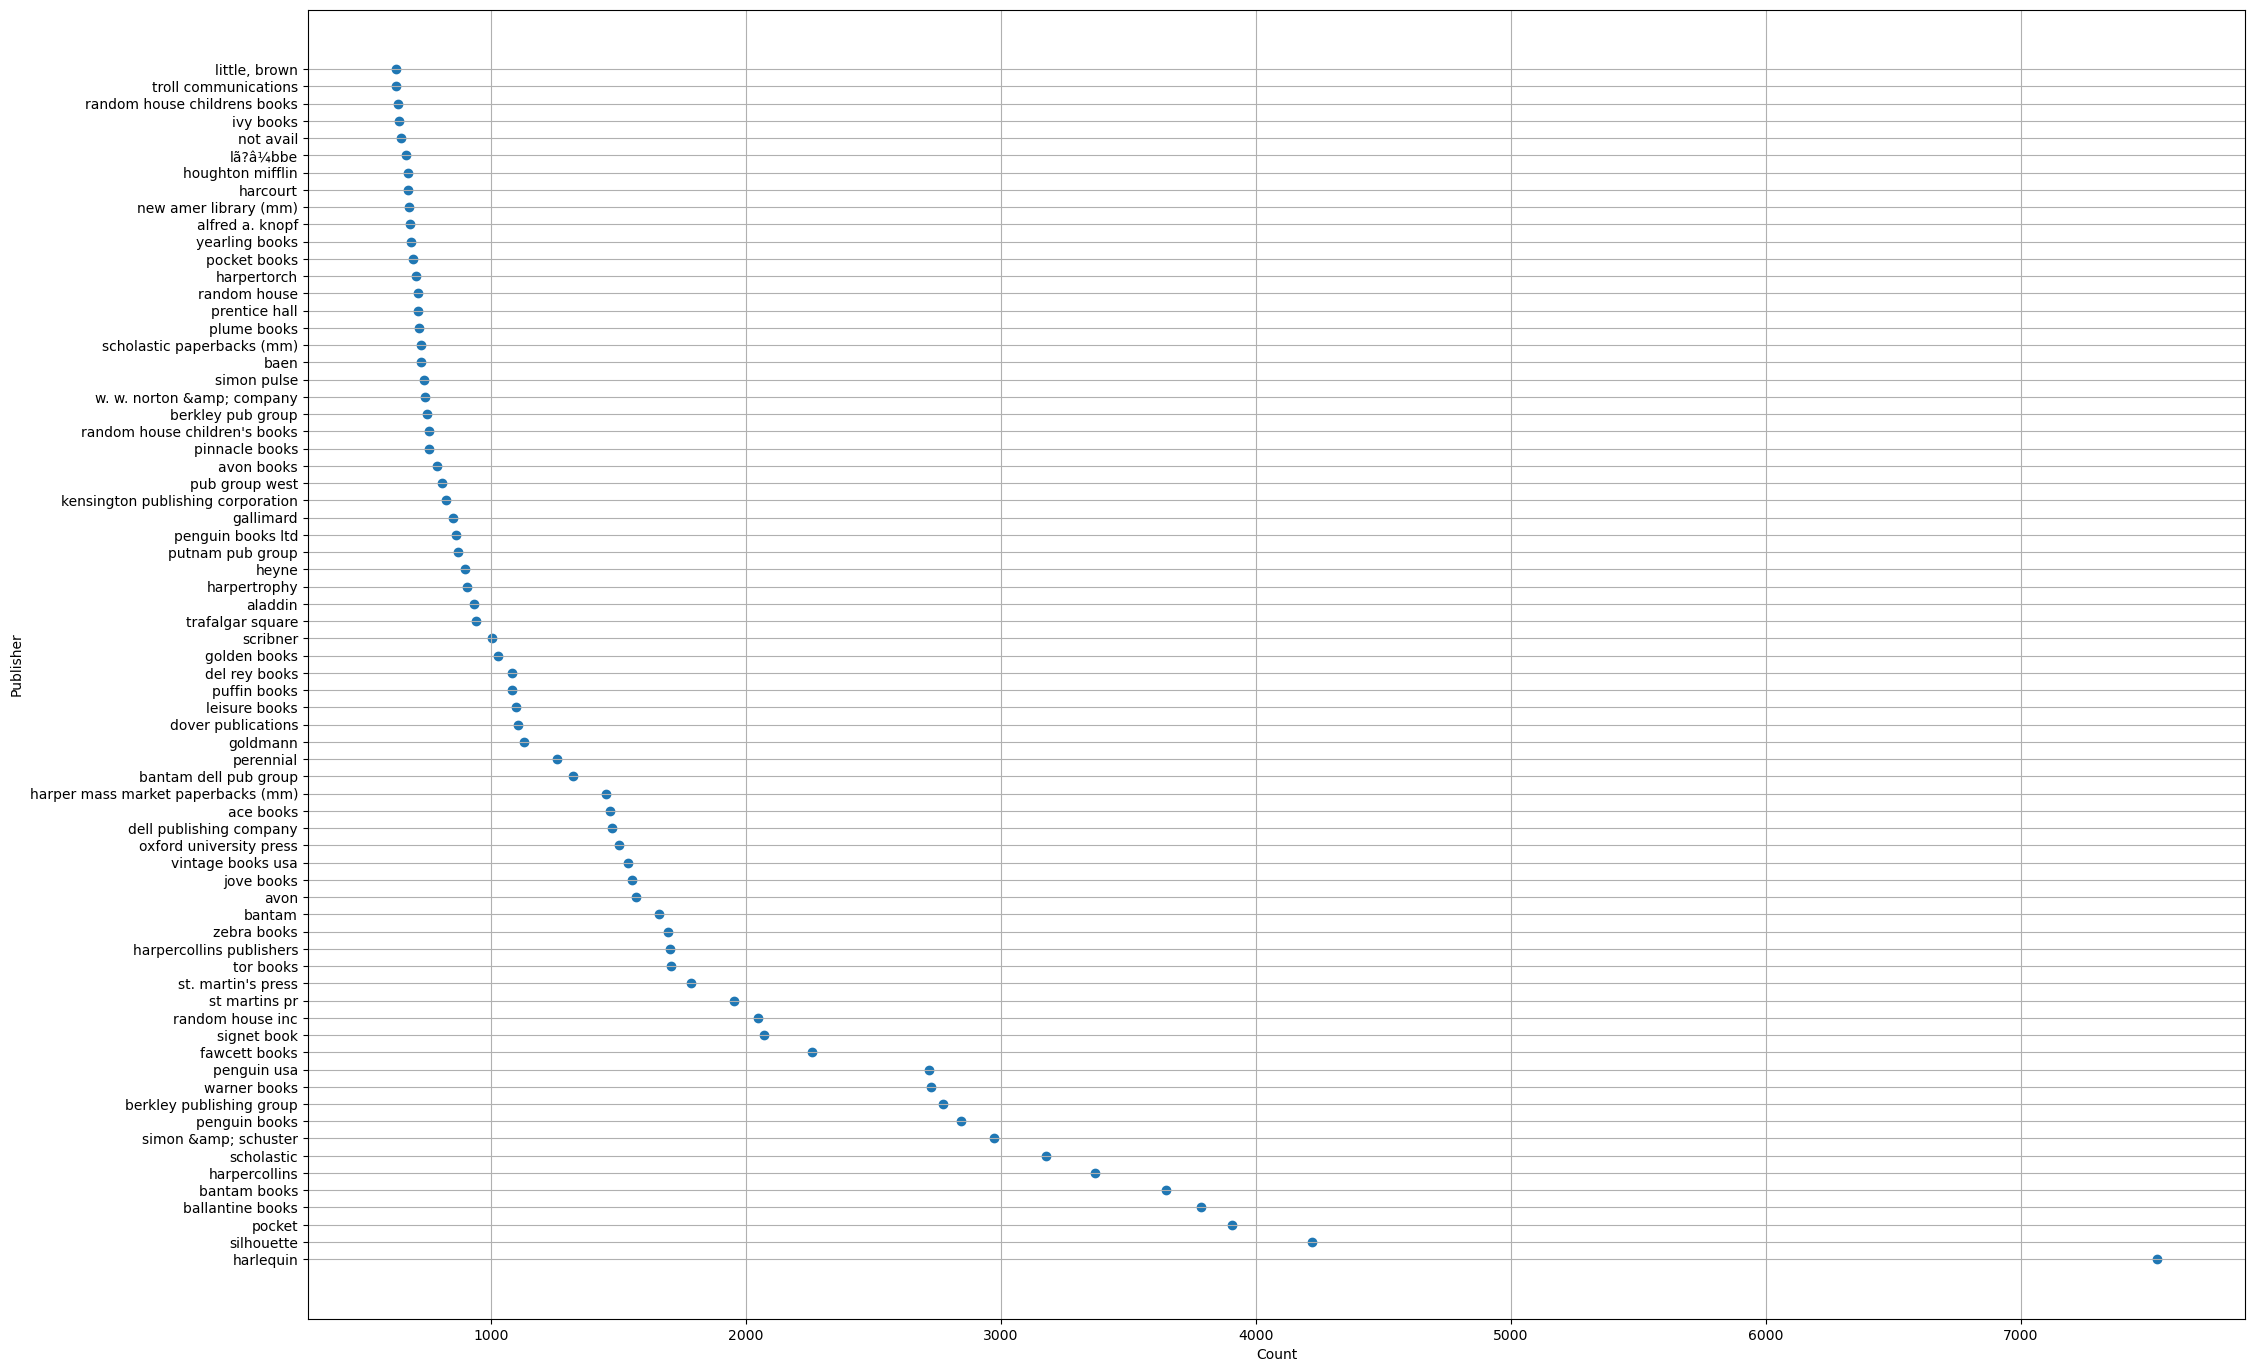

In [97]:
# publishers with highest no of books
x = books['Publisher'].value_counts().head(70)
plt.figure(figsize=((25,17)))
plt.grid()
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.scatter(x=x.values,y=x.index)

### Users

In [12]:
print(users.info())
users.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [15]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

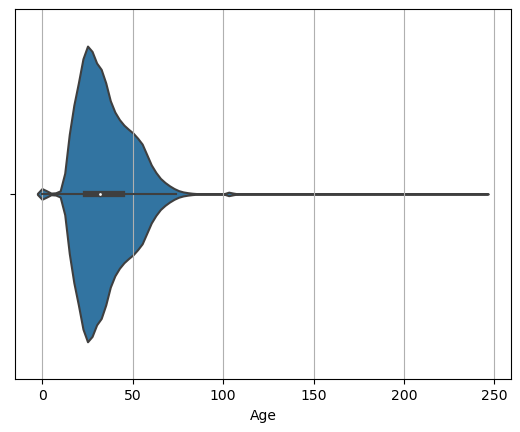

In [22]:
plt.grid()
sns.violinplot(x=users['Age'])

 - age > 150 exists .... ?

### Ratings

In [23]:
print(ratings.info())
print('\nDUP :-',ratings.duplicated().sum())
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None

DUP :- 0


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


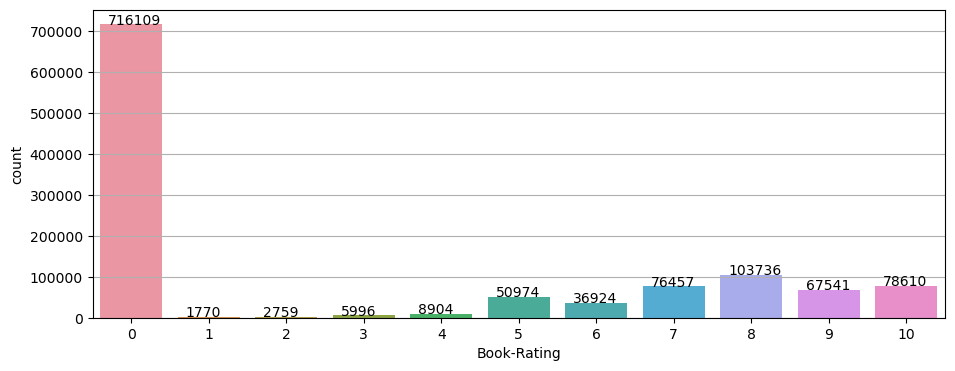

In [24]:
plot_value_count(ratings,'Book-Rating')

<AxesSubplot:xlabel='Book-Rating'>

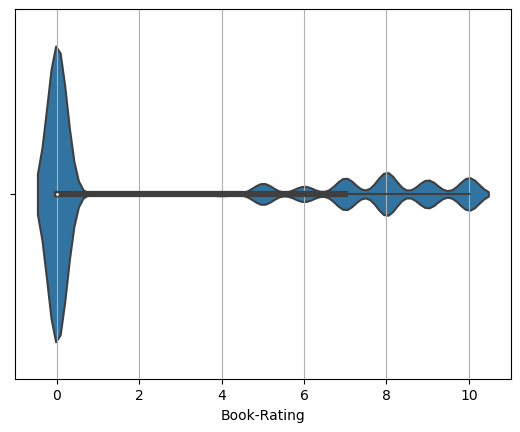

In [30]:
plt.grid()
sns.violinplot(x=ratings['Book-Rating'])

## Popularity based

In [99]:
ratings_and_book = ratings.merge(books,on='ISBN')

In [100]:
num_rating_df = ratings_and_book.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df.head(5)

,Book-Title,num_ratings
0,a light in the storm: the civil war diary of ...,4
1,always have popsicles,1
2,apple magic (the collector's series),1
3,"ask lily (young women of faith: lily series, ...",1
4,beyond ibm: leadership marketing and finance ...,1


In [101]:
avg_rating_df = ratings_and_book.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df.head(5)

,Book-Title,avg_rating
0,a light in the storm: the civil war diary of ...,2.25
1,always have popsicles,0.00
2,apple magic (the collector's series),0.00
3,"ask lily (young women of faith: lily series, ...",8.00
4,beyond ibm: leadership marketing and finance ...,0.00


In [102]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df.head(5)

,Book-Title,num_ratings,avg_rating
0,a light in the storm: the civil war diary of ...,4,2.25
1,always have popsicles,1,0.00
2,apple magic (the collector's series),1,0.00
3,"ask lily (young women of faith: lily series, ...",1,8.00
4,beyond ibm: leadership marketing and finance ...,1,0.00


In [103]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df.head(5)

,Book-Title,num_ratings,avg_rating
79291,harry potter and the prisoner of azkaban (book 3),428,5.852804
79279,harry potter and the goblet of fire (book 4),387,5.824289
79298,harry potter and the sorcerer's stone (book 1),278,5.737410
79283,harry potter and the order of the phoenix (boo...,347,5.501441
79271,harry potter and the chamber of secrets (book 2),556,5.183453


In [104]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')
popular_df.head(2)

,Book-Title,num_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,harry potter and the prisoner of azkaban (book 3),428,5.852804,0439136350,j. k. rowling,1999,scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,harry potter and the goblet of fire (book 4),387,5.824289,0439139597,j. k. rowling,2000,scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...


In [105]:
popular_df = popular_df[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,harry potter and the prisoner of azkaban (book 3),j. k. rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,harry potter and the goblet of fire (book 4),j. k. rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,harry potter and the sorcerer's stone (book 1),j. k. rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,harry potter and the order of the phoenix (boo...,j. k. rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,harry potter and the chamber of secrets (book 2),j. k. rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


## Collaborative Filtering Based

In [107]:
x = ratings_and_book.groupby('User-ID').count()['Book-Rating'] > 200
user_who_reads = x[x].index

In [108]:
filtered_rating = ratings_and_book[ratings_and_book['User-ID'].isin(user_who_reads)]

In [109]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [110]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [111]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [112]:
pt.fillna(0,inplace=True)

In [113]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to die: a novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\o\"" is for outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wuthering heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
year of wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you belong to me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
similarity_scores = cosine_similarity(pt)

In [116]:
similarity_scores.shape

(718, 718)

In [117]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [118]:
recommend('1984')

[['animal farm',
  'george orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["the handmaid's tale",
  'margaret atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['brave new world',
  'aldous huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['the vampire lestat (vampire chronicles, book ii)',
  'anne rice',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [119]:
pt.index[0]

'1984'

## Save Analysis

In [120]:
import pickle
pickle.dump(popular_df,open('result/popular.pkl','wb'))

In [121]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,mark p. o. morford,2002,oxford university press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,richard bruce wright,2001,harperflamingo canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,carlo d'este,1991,harperperennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,gina bari kolata,1999,farrar straus giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,e. j. w. barber,1999,w. w. norton &amp; company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,flashpoints: promise and peril in a new world,robin wright,1993,ballantine books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,from one to one hundred,teri sloat,1991,dutton books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,lily dale : the true story of the town that ta...,christine wicker,2004,harpersanfrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,republic (world's classics),plato,1996,oxford university press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [122]:
pickle.dump(pt,open('result/pt.pkl','wb'))
pickle.dump(books,open('result/books.pkl','wb'))
pickle.dump(similarity_scores,open('result/similarity_scores.pkl','wb'))